In [1]:
# Google Colb用に必要なパッケージのインストール
!pip install torchinfo
!pip install einops

In [2]:
# Google driveにマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/spring_school_0321/')

In [4]:
import torch
import torch.nn as nn
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset

import torch.nn.functional as F
import torch.nn.init as init

import os
import glob
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt

import util

In [11]:
# モデル構造の定義
#
# model2 : Neural Network
#
# model2 : Convolutional Neural Network
#
# model3 : Convolutional Neural Network + Regularization
#

import model2

model = model2.Model()

# モデル保存のディレクトリの指定
save_dir = '/content/drive/MyDrive/spring_school_0321/model2_0315'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#-------------------------------------------------------------------------------------------------------------------------------
# パラメータ設定
#-------------------------------------------------------------------------------------------------------------------------------

# バッチサイズ
batch_size = 128

#エポック数
num_epochs = 100

#-------------------------------------------------------------------------------------------------------------------------------
# デバイスの割り当て
#-------------------------------------------------------------------------------------------------------------------------------

device = torch.device(("cuda" if torch.cuda.is_available() else "cpu"))
print(device)

#-------------------------------------------------------------------------------------------------------------------------------
# データの読み込み
#-------------------------------------------------------------------------------------------------------------------------------

train_dataset = util.MyDataset('/content/drive/MyDrive/spring_school_0321/data/train_data.pt', '/content/drive/MyDrive/spring_school_0321/data/train_label_for_CLA.pt')
train_loader = util.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)

valid_dataset = util.MyDataset('/content/drive/MyDrive/spring_school_0321/data/valid_data.pt', '/content/drive/MyDrive/spring_school_0321/data/valid_label_for_CLA.pt')
valid_loader = util.DataLoader(valid_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)

#-------------------------------------------------------------------------------------------------------------------------------
# 学習の実行
#-------------------------------------------------------------------------------------------------------------------------------

# モデル構造の転送
model.to(device)

# パラメータの初期化
model.apply(util.init_weights)

# モデル構造の表示
print(summary(model, input_size=(1,1,128)))

# 最適化アリゴリズムの設定
optimizer = torch.optim.Adam(model.parameters())

# 学習の実行
history = np.zeros((0,3))
history = util.fit(model, optimizer, num_epochs, train_loader, valid_loader, device, history, save_dir)

# 学習過程の保存
np.save(save_dir+'/history', history)

cuda


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [1, 3]                    --
├─ConvReLU: 1-1                          [1, 32, 128]              --
│    └─Conv1d: 2-1                       [1, 32, 128]              192
│    └─ReLU: 2-2                         [1, 32, 128]              --
├─MaxPool1d: 1-2                         [1, 32, 64]               --
├─ConvReLU: 1-3                          [1, 64, 64]               --
│    └─Conv1d: 2-3                       [1, 64, 64]               10,304
│    └─ReLU: 2-4                         [1, 64, 64]               --
├─MaxPool1d: 1-4                         [1, 64, 32]               --
├─ConvReLU: 1-5                          [1, 128, 32]              --
│    └─Conv1d: 2-5                       [1, 128, 32]              41,088
│    └─ReLU: 2-6                         [1, 128, 32]              --
├─AdaptiveAvgPool1d: 1-6                 [1, 128, 1]               --
├─Line

Epoch Train 1/100:   0%|          | 0/793 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch Valid 1/100: 100%|██████████| 100/100 [00:00<00:00, 205.18it/s]


Epoch [1/100], loss: 18.27135 acc: 0.82576 val_loss: 10.29953 val_acc: 0.91714


Epoch Valid 2/100: 100%|██████████| 100/100 [00:00<00:00, 198.48it/s]


Epoch [2/100], loss: 9.07202 acc: 0.92300 val_loss: 8.60763 val_acc: 0.92715


Epoch Valid 3/100: 100%|██████████| 100/100 [00:00<00:00, 135.24it/s]


Epoch [3/100], loss: 7.42235 acc: 0.93560 val_loss: 6.52190 val_acc: 0.94497


Epoch Valid 4/100: 100%|██████████| 100/100 [00:00<00:00, 126.51it/s]


Epoch [4/100], loss: 6.83592 acc: 0.94037 val_loss: 7.44221 val_acc: 0.93567


Epoch Valid 5/100: 100%|██████████| 100/100 [00:00<00:00, 119.03it/s]


Epoch [5/100], loss: 6.39410 acc: 0.94432 val_loss: 6.07951 val_acc: 0.94836


Epoch Train 6/100:  89%|████████▊ | 702/793 [00:35<00:04, 19.98it/s]


KeyboardInterrupt: 

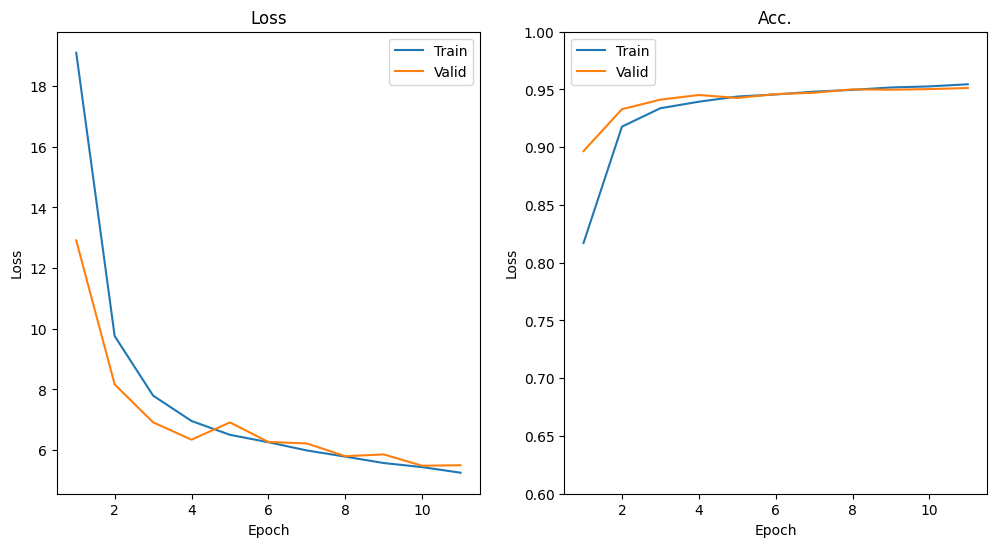

In [12]:
#-------------------------------------------------------------------------------------------------------------------------------
# 学習結果の確認
#-------------------------------------------------------------------------------------------------------------------------------

epoch = np.loadtxt(save_dir+'/history.list', usecols=0)
train_loss_l = np.loadtxt(save_dir+'/history.list', usecols=1)
valid_loss_l = np.loadtxt(save_dir+'/history.list', usecols=2)
train_acc_l = np.loadtxt(save_dir+'/history.list', usecols=3)
valid_acc_l = np.loadtxt(save_dir+'/history.list', usecols=4)

fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epoch,train_loss_l,label='Train')
plt.plot(epoch,valid_loss_l,label='Valid')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch,train_acc_l,label='Train')
plt.plot(epoch,valid_acc_l,label='Valid')
plt.title('Acc.')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0.6,1)
plt.legend()
plt.show()
plt.close()

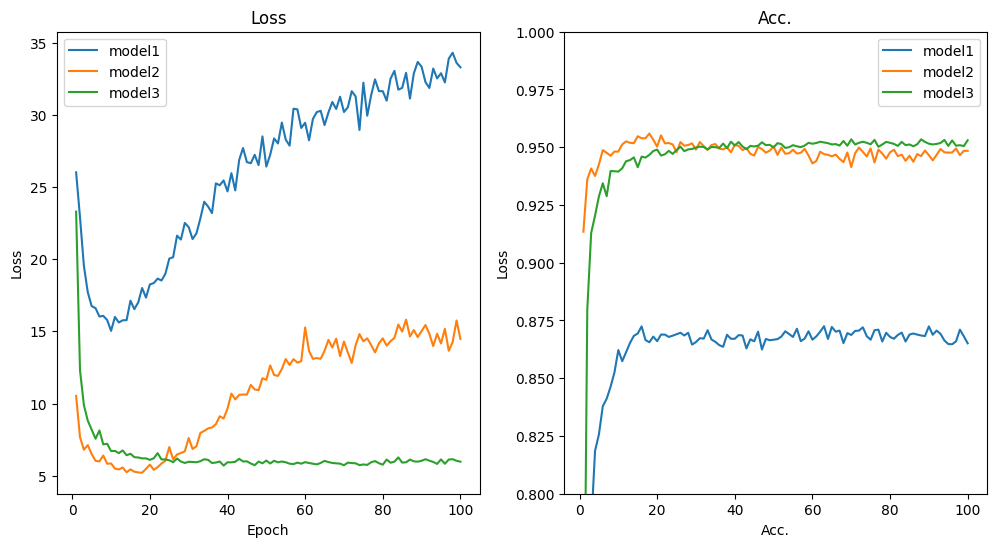

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
# 学習結果の比較
#-------------------------------------------------------------------------------------------------------------------------------

epoch = np.loadtxt('/content/drive/MyDrive/spring_school_0321/model2_Epoch100/history.list', usecols=0)
train_loss_1 = np.loadtxt('/content/drive/MyDrive/spring_school_0321/model2_Epoch100/history.list', usecols=1)
valid_loss_1 = np.loadtxt('/content/drive/MyDrive/spring_school_0321/model2_Epoch100/history.list', usecols=2)
train_acc_1 = np.loadtxt('/content/drive/MyDrive/spring_school_0321/model2_Epoch100/history.list', usecols=3)
valid_acc_1 = np.loadtxt('/content/drive/MyDrive/spring_school_0321/model2_Epoch100/history.list', usecols=4)

train_loss_2 = np.loadtxt('/content/drive/MyDrive/spring_school_0321/model2_Epoch100/history.list', usecols=1)
valid_loss_2 = np.loadtxt('/content/drive/MyDrive/spring_school_0321/model2_Epoch100/history.list', usecols=2)
train_acc_2 = np.loadtxt('/content/drive/MyDrive/spring_school_0321/model2_Epoch100/history.list', usecols=3)
valid_acc_2 = np.loadtxt('/content/drive/MyDrive/spring_school_0321/model2_Epoch100/history.list', usecols=4)

train_loss_3 = np.loadtxt('/content/drive/MyDrive/spring_school_0321/model3_Epoch100/history.list', usecols=1)
valid_loss_3 = np.loadtxt('/content/drive/MyDrive/spring_school_0321/model3_Epoch100/history.list', usecols=2)
train_acc_3 = np.loadtxt('/content/drive/MyDrive/spring_school_0321/model3_Epoch100/history.list', usecols=3)
valid_acc_3 = np.loadtxt('/content/drive/MyDrive/spring_school_0321/model3_Epoch100/history.list', usecols=4)

fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epoch,valid_loss_1,label='model2')
plt.plot(epoch,valid_loss_2,label='model2')
plt.plot(epoch,valid_loss_3,label='model3')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch,valid_acc_1,label='model2')
plt.plot(epoch,valid_acc_2,label='model2')
plt.plot(epoch,valid_acc_3,label='model3')
plt.title('Acc.')
plt.xlabel('Acc.')
plt.ylabel('Loss')
plt.ylim(0.8,1)
plt.legend()
plt.show()
plt.close()